In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm
import re

In [2]:
data = pd.read_csv("../data/curated/listings_with_distances.csv")
school = pd.read_csv("../data/curated/Closest_and_average_dist_school.csv")
neighbour = pd.read_csv("../data/curated/neigh_stat.csv")

In [3]:
data = pd.merge(data, school, left_on='id', right_on='listing_id')
data[["id", "Suburb", "price", "beds", "baths", "parking", "title", "address", "propertyType", "status", "bond", "Coordinates", "Latitude", "Longitude", "ClosestDstToShoppingCentre", "DstToCBD", "ClosestShop", "ClosestDstToStation", "ClosestStation", "ClosestDstToUni", "ClosestUni", "closest_school", "dist_closest_school", "ave_dist_3_schools"]]\
.to_csv("../data/curated/listings_with_distances.csv", index = False)

KeyError: "['closest_school', 'dist_closest_school', 'ave_dist_3_schools'] not in index"

In [3]:
data = pd.merge(data, neighbour, left_on='id', right_on='id')

In [5]:
def get_Suburb(x:str):
    try:
        suburb = re.findall(", [A-Za-z ]+ VIC", x)[0]
        suburb = re.sub(", || VIC", "", suburb)
    except IndexError:
        suburb = None
    return suburb
data["Suburb"] = data["address"].apply(lambda x: get_Suburb(x))
#get_Suburb("level1, 208/16 Anderson Street, West Melbourne VIC")

In [50]:
data.to_csv("../data/curated/listings_with_distances.csv", index = False)

In [4]:
COLS = ["price", "Suburb", "beds","propertyType", "closest_school", "dist_closest_school","ave_dist_3_schools", "ClosestDstToShoppingCentre", "DstToCBD", "ClosestShop", "ClosestDstToStation", "ClosestStation", "ClosestDstToUni", "ClosestUni", "age0To19", "age20To39", "age40To59","age60Plus","longTermResident","owner","renter","family","single"]
CORR_COLS = ["price", "ClosestDstToShoppingCentre", "DstToCBD", "ClosestDstToStation", "ClosestDstToUni", "dist_closest_school","ave_dist_3_schools", "age0To19", "age20To39", "age40To59","age60Plus","longTermResident","owner","renter","family","single"]
DISCRETE_COLS = ["Suburb", "closest_school", "ClosestShop", "ClosestStation", "ClosestUni"]
data = data[COLS]

In [5]:
data = data[data['ClosestDstToShoppingCentre'] < 100000]
data = data[data['ClosestDstToStation'] < 100000]
data = data[data['DstToCBD'] < 100000] 
data = data[data['ClosestDstToUni'] < 100000]


In [6]:
bed_4_house = data[(data["beds"] == 4) & (data["propertyType"] == "House")]
bed_3_house = data[(data["beds"] == 3) & (data["propertyType"] == "House")]
bed_2_house = data[(data["beds"] == 2) & (data["propertyType"] == "House")]
bed_3_flat = data[(data["beds"] == 3) & (data["propertyType"] == "Apartment / Unit / Flat")]
bed_2_flat = data[(data["beds"] == 2) & (data["propertyType"] == "Apartment / Unit / Flat")]
bed_1_flat = data[(data["beds"] == 1) & (data["propertyType"] == "Apartment / Unit / Flat")]

In [42]:
bed_2_flat[bed_2_flat["Suburb"] == "Toorak"][CORR_COLS].corr()
#sns.heatmap(bed_2_house[CORR_COLS].corr())

,price,ClosestDstToShoppingCentre,DstToCBD,ClosestDstToStation,ClosestDstToUni,dist_closest_school,ave_dist_3_schools,age0To19,age20To39,age40To59,age60Plus,longTermResident,owner,renter,family,single
price,1.000000,0.168688,0.362495,0.418602,0.348704,-0.091798,-0.170252,-0.094078,0.165178,0.349967,-0.181586,0.220484,-0.053901,0.053901,0.053443,-0.053443
ClosestDstToShoppingCentre,0.168688,1.000000,0.684380,0.007485,0.341808,0.045835,-0.232526,0.199714,0.407529,-0.178768,-0.442647,0.184228,-0.034778,0.034778,-0.037422,0.037422
DstToCBD,0.362495,0.684380,1.000000,0.097206,0.856165,-0.342129,-0.740905,-0.157141,0.712461,0.041677,-0.590109,-0.001239,-0.254974,0.254974,-0.402412,0.402411
ClosestDstToStation,0.418602,0.007485,0.097206,1.000000,-0.115819,-0.068474,0.206558,0.461094,-0.128326,0.236741,-0.170584,-0.034567,0.034233,-0.034233,0.438270,-0.438270
ClosestDstToUni,0.348704,0.341808,0.856165,-0.115819,1.000000,-0.358947,-0.826566,-0.498617,0.837697,0.170072,-0.558359,-0.197758,-0.510686,0.510686,-0.700206,0.700206
dist_closest_school,-0.091798,0.045835,-0.342129,-0.068474,-0.358947,1.000000,0.671671,-0.266289,-0.297444,-0.256831,0.470104,0.380274,0.251770,-0.251770,0.089975,-0.089975
ave_dist_3_schools,-0.170252,-0.232526,-0.740905,0.206558,-0.826566,0.671671,1.000000,0.339536,-0.576284,-0.174730,0.398558,0.255034,0.398043,-0.398043,0.580721,-0.580720
age0To19,-0.094078,0.199714,-0.157141,0.461094,-0.498617,-0.266289,0.339536,1.000000,-0.196974,-0.137956,-0.302883,-0.150845,0.125826,-0.125826,0.624540,-0.624540
age20To39,0.165178,0.407529,0.712461,-0.128326,0.837697,-0.297444,-0.576284,-0.196974,1.000000,0.103636,-0.850329,-0.486246,-0.720777,0.720777,-0.683782,0.683782
age40To59,0.349967,-0.178768,0.041677,0.236741,0.170072,-0.256831,-0.174730,-0.137956,0.103636,1.000000,-0.244105,-0.178151,-0.165596,0.165596,0.007315,-0.007315


In [19]:
bed_3_flat[CORR_COLS].corr()

,price,ClosestDstToShoppingCentre,DstToCBD,ClosestDstToStation,ClosestDstToUni,dist_closest_school,ave_dist_3_schools,age0To19,age20To39,age40To59,age60Plus,longTermResident,owner,renter,family,single
price,1.000000,-0.147884,-0.367260,-0.177655,-0.233521,-0.027432,-0.111054,-0.476555,0.220591,-0.010368,0.031324,-0.361213,-0.334439,0.329463,-0.193359,0.180564
ClosestDstToShoppingCentre,-0.147884,1.000000,0.477499,0.088456,0.688731,0.060006,0.186232,0.227949,-0.176367,0.022278,0.086352,0.102533,0.158120,-0.153029,0.154416,-0.143340
DstToCBD,-0.367260,0.477499,1.000000,0.382481,0.708171,0.147961,0.335008,0.456378,-0.335695,0.074130,0.111925,0.267655,0.316539,-0.317609,0.146483,-0.145481
ClosestDstToStation,-0.177655,0.088456,0.382481,1.000000,0.360522,0.149696,0.256304,0.322131,-0.259225,0.116118,0.085306,0.123577,0.302284,-0.300767,0.197222,-0.191599
ClosestDstToUni,-0.233521,0.688731,0.708171,0.360522,1.000000,0.114212,0.342910,0.368357,-0.280900,0.076836,0.102142,0.127215,0.246680,-0.244453,0.149630,-0.143049
dist_closest_school,-0.027432,0.060006,0.147961,0.149696,0.114212,1.000000,0.586211,0.116041,-0.138075,0.056760,0.037789,0.122758,0.196623,-0.225137,0.143797,-0.197892
ave_dist_3_schools,-0.111054,0.186232,0.335008,0.256304,0.342910,0.586211,1.000000,0.225992,-0.195193,0.104702,0.040786,0.203533,0.240249,-0.254375,0.131405,-0.156775
age0To19,-0.476555,0.227949,0.456378,0.322131,0.368357,0.116041,0.225992,1.000000,-0.650709,0.404878,0.059533,0.554590,0.708763,-0.677751,0.630130,-0.564151
age20To39,0.220591,-0.176367,-0.335695,-0.259225,-0.280900,-0.138075,-0.195193,-0.650709,1.000000,-0.487161,-0.684657,-0.659680,-0.743622,0.778967,-0.665801,0.729305
age40To59,-0.010368,0.022278,0.074130,0.116118,0.076836,0.056760,0.104702,0.404878,-0.487161,1.000000,0.032190,0.310235,0.366890,-0.303916,0.492891,-0.367879


In [55]:
bed_2_house.loc[:, "total"] = bed_2_house["ClosestDstToShoppingCentre"]+ bed_2_house["DstToCBD"]+bed_2_house["ClosestDstToStation"]+bed_2_house["dist_closest_school"]
bed_2_flat.loc[:, "total"] = bed_2_flat["ClosestDstToShoppingCentre"]+ bed_2_flat["DstToCBD"]+bed_2_flat["ClosestDstToStation"]+bed_2_flat["dist_closest_school"]
bed_1_flat.loc[:, "total"] = bed_1_flat["ClosestDstToShoppingCentre"]+ bed_1_flat["DstToCBD"]+bed_1_flat["ClosestDstToStation"]+bed_1_flat["dist_closest_school"]

/tmp/ipykernel_1033/4230284574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_2_house.loc[:, "total"] = bed_2_house["ClosestDstToShoppingCentre"]+ bed_2_house["DstToCBD"]+bed_2_house["ClosestDstToStation"]+bed_2_house["dist_closest_school"]
/tmp/ipykernel_1033/4230284574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_2_flat.loc[:, "total"] = bed_2_flat["ClosestDstToShoppingCentre"]+ bed_2_flat["DstToCBD"]+bed_2_flat["ClosestDstToStation"]+bed_2_flat["dist_closest_school"]
/tmp/ipykernel_10

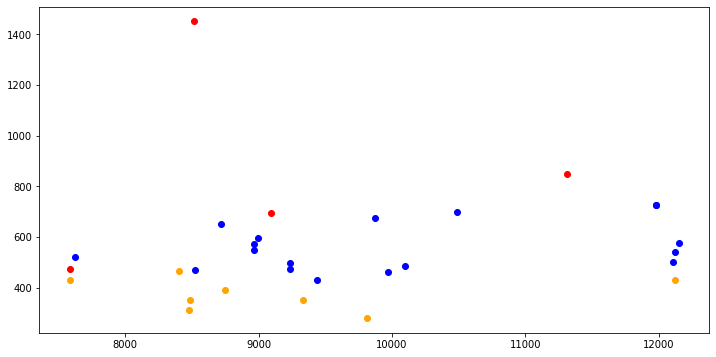

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter("total", "price", color="blue", data=bed_2_flat[bed_2_flat["Suburb"] == "Toorak"])
ax.scatter("total", "price", color="red", data=bed_2_house[bed_2_house["Suburb"] == "Toorak"])
ax.scatter("total", "price", color="orange", data=bed_1_flat[bed_1_flat["Suburb"] == "Toorak"])


(0.0, 1000.0)

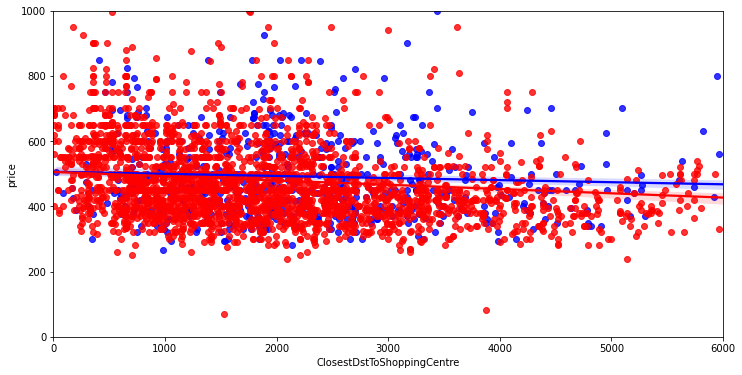

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot("ClosestDstToShoppingCentre", "price", color="blue", data=bed_2_house)
sns.regplot("ClosestDstToShoppingCentre", "price", color="red", data=bed_2_flat)
#sns.regplot("ClosestDstToShoppingCentre", "price", color="orange", data=bed_1_flat)
plt.xlim(0, 6000)
plt.ylim(0, 1000)

## ANOVAS

Removing outliers for each suburb

In [152]:
import math


def remove_outlier(dataframe):
    df = pd.DataFrame()
    for suburb in dataframe["Suburb"].unique():
        prices = dataframe[dataframe["Suburb"] == suburb]["price"]
        if len(prices) > 0:
            mean = prices.sum()/len(prices)
            sd = math.sqrt(((prices-mean)*(prices-mean)).sum()/(len(prices)))
            print(sd)
            df = pd.concat([df, dataframe[(dataframe.Suburb == suburb) & (dataframe.price < mean + 2*sd) & (dataframe.price > mean - 2*sd)]])
    return df


In [153]:
bed_1_flat_clean = remove_outlier(bed_1_flat)
bed_2_flat_clean = remove_outlier(bed_2_flat)
bed_2_house_clean = remove_outlier(bed_2_house)

35.47651204996844
152.03747002054934
0.0
54.48623679425842
38.23781083580482
153.41465931359915
35.175749222061114
32.49943103735017
48.87881840724967
75.56493347841732
30.641293851417057
37.66629793329841
71.29846474069527
128.69075753285534
0.0
818.2917504709973
20.60315014550851
62.495918234060426
50.20956084253277
58.20355934981687
34.64101615137755
49.13402003783166
34.427359113872726
71.02316911359806
75.53401720484646
26.246692913372705
33.573328213731486
0.0
0.0
104.95497275465951
135.3071494465759
55.260465147015026
45.8257569495584
43.666525303701064
54.36910887627275
78.97082076656149
60.074823137484145
15.0
0.0
222.21540788163182
25.91301555203485
59.307225013277346
71.42856522817434
51.90283538485787
25.0
60.55300708194983
0.0
10.606601717798213
37.26779962499649
42.90473547908916
5.448623679425842
44.35298749802543
65.74360974438673
0.0
22.93468988235943
26.246692913372705
5.0
58.04425727381767
40.0
44.54211490264017
52.7359117574437
71.84783035446233
20.766559657295186
0

### Back ward elimination

In [183]:
query = "price~ave_dist_3_schools+Suburb+closest_school+ClosestDstToShoppingCentre+DstToCBD+ClosestDstToStation+ClosestDstToUni+age0To19+age20To39+age40To59+age60Plus+longTermResident+owner+renter+family+single"

In [184]:
def back_ward_elim(dataframe):
    P_VALUE = 0.05
    stats_query =  query
    model = ols(stats_query, data = dataframe).fit()
    anova = sm.stats.anova_lm(model,typ=2)
    while len(anova[anova["PR(>F)"] >= P_VALUE]) > 0:
        max_p = max(anova["PR(>F)"])
        eliminated_param = anova[anova["PR(>F)"] == max_p].index[0]
        stats_query = re.sub(eliminated_param, "", stats_query)
        stats_query = re.sub("\+\+", "+", stats_query)
        stats_query = re.sub("\+$", "", stats_query)
        model = ols(stats_query, data = dataframe).fit()
        anova = sm.stats.anova_lm(model,typ=2)
    return anova, model

    

In [185]:
bed_1_flat_anova, bed_1_flat_model = back_ward_elim(bed_1_flat_clean)
bed_2_flat_anova, bed_2_flat_model = back_ward_elim(bed_2_flat_clean)
bed_2_house_anova, bed_2_house_model = back_ward_elim(bed_2_house_clean)

In [186]:
bed_1_flat_anova

,sum_sq,df,F,PR(>F)
Suburb,6.885844e+05,99.0,2.094602,3.738628e-08
closest_school,1.613181e+06,264.0,1.840174,1.919313e-10
ave_dist_3_schools,3.094163e+04,1.0,9.318002,2.352522e-03
Residual,2.394174e+06,721.0,NaN,NaN


In [187]:
bed_2_flat_anova

,sum_sq,df,F,PR(>F)
Suburb,2.203627e+06,189.0,2.125201,6.579525e-15
closest_school,4.741030e+06,558.0,1.548682,2.642380e-11
age0To19,7.436388e+04,1.0,13.554573,2.390201e-04
age20To39,6.508158e+04,1.0,11.862655,5.867218e-04
owner,2.716764e+04,1.0,4.951945,2.619311e-02
Residual,9.255316e+06,1687.0,NaN,NaN


In [188]:
bed_2_house_anova

,sum_sq,df,F,PR(>F)
Suburb,4.834709e+06,121.0,5.379493,1.956836e-24
closest_school,6.002247e+06,300.0,2.693699,1.018226e-12
Residual,1.351808e+06,182.0,NaN,NaN


In [182]:
bed_1_flat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     4.548
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           8.83e-65
Time:                        01:05:37   Log-Likelihood:                -5500.1
No. Observations:                1047   AIC:                         1.168e+04
Df Residuals:                     705   BIC:                         1.338e+04
Df Model:                         341                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================================================
                                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                        302.8084     42.074      7.197      0.000     220.204     385.413
ClosestStation[T.Alphington Railway Station (Alphington)]                                                         31.7760     57.450      0.553      0.580     -81.017     144.569
ClosestStation[T.Altona Railway Station (Altona)]                                                                184.4196     77.186      2.389      0.017      32.877     335.962
ClosestStation[T.Anstey Railway Station (Brunswick)]                                                             -20.9013     32.224     -0.649      0.517     -84.168      42.365
ClosestStation[T.Armadale Railway Station (Armadale)]                                                            124.6638     56.422      2.209      0.027      13.888     235.439
ClosestStation[T.Ascot Vale Railway Station (Ascot Vale)]                                                        -78.3478     91.718     -0.854      0.393    -258.421     101.726
ClosestStation[T.Auburn Railway Station (Hawthorn East)]                                                         -13.1299     42.934     -0.306      0.760     -97.424      71.164
ClosestStation[T.Balaclava Railway Station (Balaclava)]                                                          112.4463     54.173      2.076      0.038       6.087     218.806
ClosestStation[T.Batman Railway Station (Coburg North)]                                                           45.1461     34.796      1.297      0.195     -23.169     113.461
ClosestStation[T.Bell Railway Station (Preston)]                                                                 -28.3890     41.770     -0.680      0.497    -110.398      53.620
ClosestStation[T.Bentleigh Railway Station (Bentleigh)]                                                           29.3263     38.235      0.767      0.443     -45.742     104.394
ClosestStation[T.Blackburn Railway Station (Blackburn)]                                                           13.5567     26.340      0.515      0.607     -38.158      65.271
ClosestStation[T.Box Hill Railway Station (Box Hill)]                                                             28.9215     39.697      0.729      0.467     -49.018     106.861
ClosestStation[T.Brunswick Railway Station (Brunswick)]                                                          -24.2773     33.493     -0.725      0.469     -90.036      41.481
ClosestStation[T.Burnley Railway Station

In [175]:
bed_2_house_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     30.68
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           1.94e-35
Time:                        01:03:06   Log-Likelihood:                -3167.4
No. Observations:                 517   AIC:                             6351.
Df Residuals:                     509   BIC:                             6385.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    502.7267     36.321     13.841      0.000     431.369     574.084
ave_dist_3_schools            -0.0780      0.017     -4.526      0.000      -0.112      -0.044
ClosestDstToShoppingCentre    -0.0095      0.003     -2.811      0.005      -0.016      -0.003
DstToCBD                      -0.0028      0.000     -8.667      0.000      -0.003      -0.002
ClosestDstToStation            0.0040      0.002      2.337      0.020       0.001       0.007
age40To59                    652.7656    131.183      4.976      0.000     395.038     910.493
age60Plus                    303.0789     70.864      4.277      0.000     163.857     442.301
longTermResident            -214.8859     35.732     -6.014      0.000    -285.087    -144.685
==============================================================================
Omnibus:                      175.303   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              991.358
Skew:                           1.369   Prob(JB):                    5.36e-216
Kurtosis:                       9.206   Cond. No.                     7.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='age20To39', ylabel='price'>

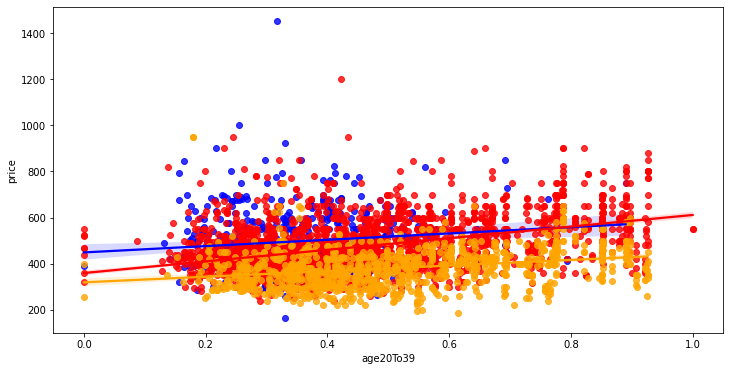

In [199]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot("age20To39", "price", color="blue", data=bed_2_house_clean)
sns.regplot("age20To39", "price", color="red", data=bed_2_flat_clean)
sns.regplot("age20To39", "price", color="orange", data=bed_1_flat_clean)